In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [2]:
teams_df = pd.read_csv('data/2025/womens_l2_sw_teams.csv')
teams_df

,Club ID,Club
0,183415,OAKVILLE SC L2 WOMEN
1,175323,BURLINGTON SC L2 WOMEN
2,175386,FC LONDON L2 WOMEN
3,175329,GUELPH UNITED FC L2 WOMEN
4,175334,HAMILTON UNITED L2 WOMEN
5,175738,RUSH CANADA ACADEMY L2 WOMEN
6,175398,ST CATHARINES ROMA WOMEN
7,183413,CAMBRIDGE UNITED WOMEN
8,183423,WATERLOO UNITED L2 WOMEN
9,183412,RAILWAY CITY FC WOMEN


In [3]:
scores_df = pd.read_csv('data/2025/2025-06-28_womens_l2_sw_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262608412,4,1,175386,175334
1,262608413,0,0,183423,183412
2,262608414,2,3,175323,175738
3,262608415,3,0,175386,183412
4,262608416,1,0,175398,175329
5,262608417,3,1,183413,183415
6,262608418,7,0,183423,175323
7,262608419,0,2,175334,175398
8,262608420,4,3,183413,175738
9,262608421,0,4,175329,183415


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           OAKVILLE SC L2 WOMEN  BURLINGTON SC L2 WOMEN  FC LONDON L2 WOMEN  GUELPH UNITED FC L2 WOMEN  HAMILTON UNITED L2 WOMEN  RUSH CANADA ACADEMY L2 WOMEN  ST CATHARINES ROMA WOMEN  CAMBRIDGE UNITED WOMEN  WATERLOO UNITED L2 WOMEN  RAILWAY CITY FC WOMEN
262608412                     0                       0                   1                          0                        -1                             0                         0                       0                         0                      0
262608413                     0                       0                   0                          0                         0                             0                         0                       0                         1                     -1
262608414                     0                      -1                   0                          0                         0                             1                         0                       0                  

In [6]:
print(X_df.T.to_string())

                              262608412  262608413  262608414  262608415  262608416  262608417  262608418  262608419  262608420  262608421  262608422  262608423  262608424  262608425  262608426  262608427  262608428  262608429  262608430  262608431  262608432  262608433  262608434  262608435  262608436  262608437  262608438  262608439  262608440  262608441  262608442  262608443  262608444  262608445  262608446  262608447  262608448  262608449  262608450  262608451  262608452  262608453  262608454  262608455  262608456  262608457  262608458  262608459
OAKVILLE SC L2 WOMEN                  0          0          0          0          0         -1          0          0          0          1          0          0          0         -1          0          0         -1          0          0          0          0          1          0          0          0          1          0          0          0          0         -1          0          0          0          0          0          0        

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                              OAKVILLE SC L2 WOMEN  BURLINGTON SC L2 WOMEN  FC LONDON L2 WOMEN  GUELPH UNITED FC L2 WOMEN  HAMILTON UNITED L2 WOMEN  RUSH CANADA ACADEMY L2 WOMEN  ST CATHARINES ROMA WOMEN  CAMBRIDGE UNITED WOMEN  WATERLOO UNITED L2 WOMEN  RAILWAY CITY FC WOMEN
OAKVILLE SC L2 WOMEN                            10                      -1                  -2                         -1                        -1                             0                        -1                      -2                        -1                     -1
BURLINGTON SC L2 WOMEN                          -1                       9                   0                         -1                         0                            -2                        -2                       0                        -2                     -1
FC LONDON L2 WOMEN                              -2                       0                   9                         -1                        -2                      

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                              OAKVILLE SC L2 WOMEN  BURLINGTON SC L2 WOMEN  FC LONDON L2 WOMEN  GUELPH UNITED FC L2 WOMEN  HAMILTON UNITED L2 WOMEN  RUSH CANADA ACADEMY L2 WOMEN  ST CATHARINES ROMA WOMEN  CAMBRIDGE UNITED WOMEN  WATERLOO UNITED L2 WOMEN  RAILWAY CITY FC WOMEN
OAKVILLE SC L2 WOMEN                            10                      -1                  -2                         -1                        -1                             0                        -1                      -2                        -1                     -1
BURLINGTON SC L2 WOMEN                          -1                       9                   0                         -1                         0                            -2                        -2                       0                        -2                     -1
FC LONDON L2 WOMEN                              -2                       0                   9                         -1                        -2                      

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                              GD
OAKVILLE SC L2 WOMEN          -8
BURLINGTON SC L2 WOMEN       -31
FC LONDON L2 WOMEN             2
GUELPH UNITED FC L2 WOMEN    -16
HAMILTON UNITED L2 WOMEN      -1
RUSH CANADA ACADEMY L2 WOMEN  -5
ST CATHARINES ROMA WOMEN      13
CAMBRIDGE UNITED WOMEN         1
WATERLOO UNITED L2 WOMEN      23
RAILWAY CITY FC WOMEN          0


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                              GD with limited blowouts
OAKVILLE SC L2 WOMEN                                -7
BURLINGTON SC L2 WOMEN                             -20
FC LONDON L2 WOMEN                                   5
GUELPH UNITED FC L2 WOMEN                          -15
HAMILTON UNITED L2 WOMEN                            -1
RUSH CANADA ACADEMY L2 WOMEN                        -2
ST CATHARINES ROMA WOMEN                            11
CAMBRIDGE UNITED WOMEN                               1
WATERLOO UNITED L2 WOMEN                            14
RAILWAY CITY FC WOMEN                                0


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                              massey_rating
WATERLOO UNITED L2 WOMEN           2.268357
RAILWAY CITY FC WOMEN              2.200455
FC LONDON L2 WOMEN                 0.408472
ST CATHARINES ROMA WOMEN           0.388800
CAMBRIDGE UNITED WOMEN             0.325442
HAMILTON UNITED L2 WOMEN           0.068170
RUSH CANADA ACADEMY L2 WOMEN      -0.461240
OAKVILLE SC L2 WOMEN              -0.618622
GUELPH UNITED FC L2 WOMEN         -1.619217
BURLINGTON SC L2 WOMEN            -2.960617


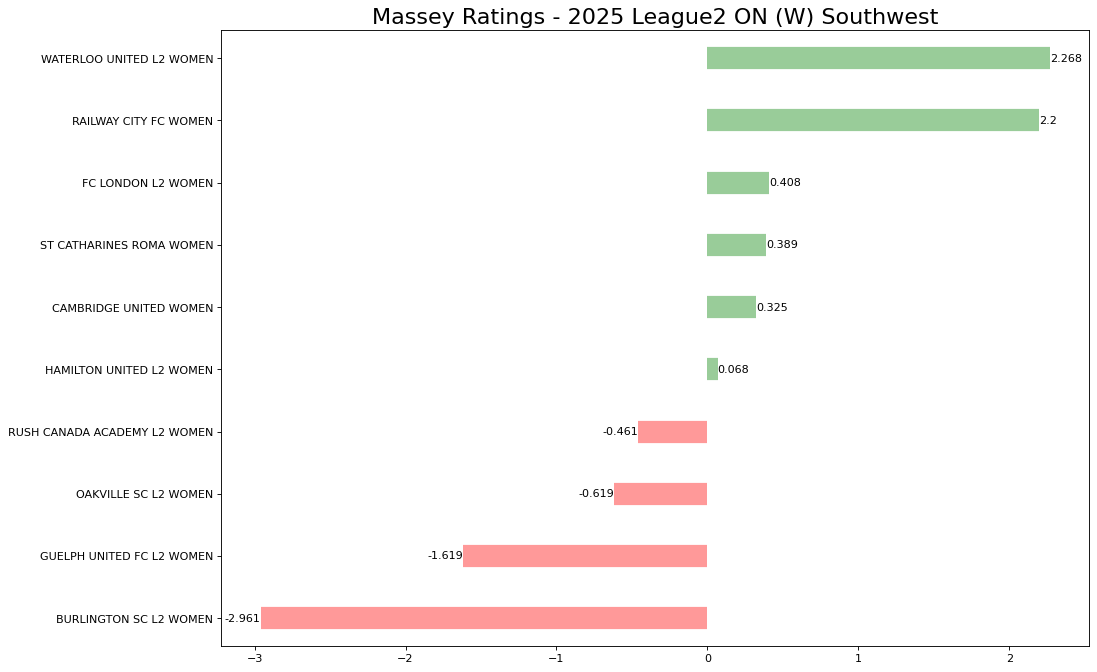

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (W) Southwest', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                              massey_rating
WATERLOO UNITED L2 WOMEN           1.405314
RAILWAY CITY FC WOMEN              1.378479
FC LONDON L2 WOMEN                 0.615984
ST CATHARINES ROMA WOMEN           0.460988
CAMBRIDGE UNITED WOMEN             0.218944
HAMILTON UNITED L2 WOMEN           0.007515
RUSH CANADA ACADEMY L2 WOMEN      -0.178724
OAKVILLE SC L2 WOMEN              -0.544213
GUELPH UNITED FC L2 WOMEN         -1.448801
BURLINGTON SC L2 WOMEN            -1.915487


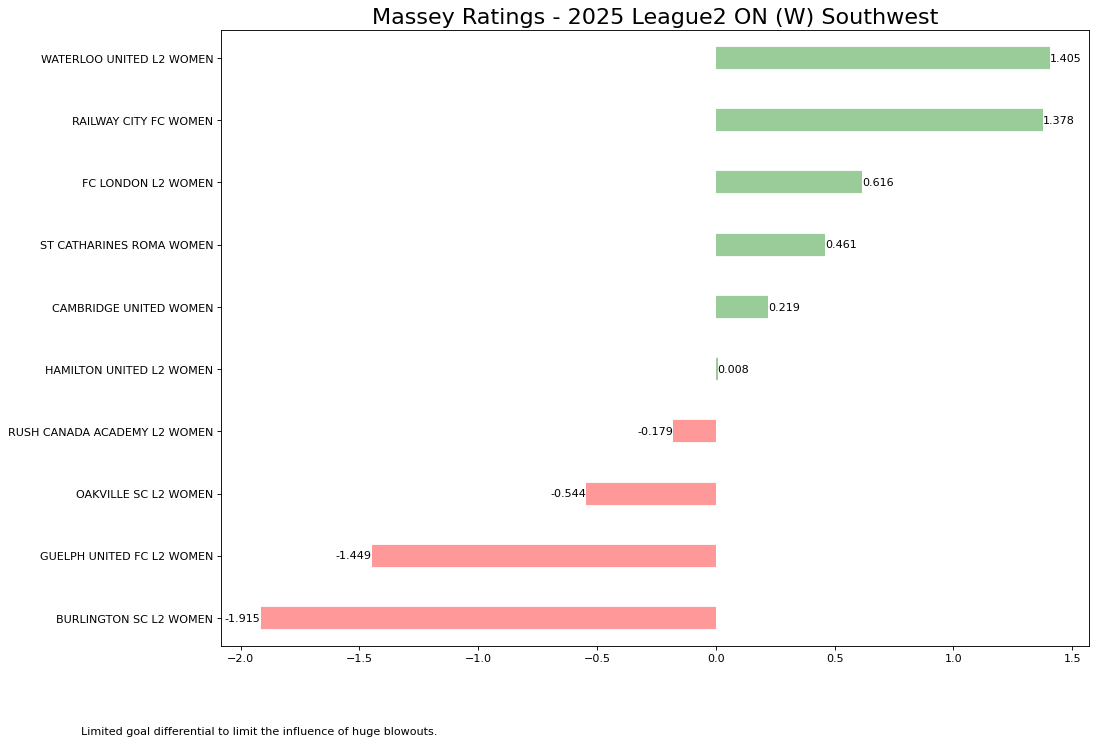

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (W) Southwest', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()